In [58]:
pip install pycaret


Note: you may need to restart the kernel to use updated packages.


In [59]:
import pycaret
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pycaret.__version__

'3.3.2'

# Dictionary for BLS data

In [60]:
data_dict = {
    'LAUMT131206000000006': 'civilian_labor_force',
    'LAUMT131206000000005': 'employed',
    'LAUMT131206000000004': 'unemployed',
    'LAUMT131206000000003': 'unemployment_rate',
    'SMU13120600000000001': 'employment_non_farm',
    'SMU13120602000000001': 'employment_construction',
    'SMU13120603000000001': 'employment_manufacturing',
    'SMU13120604000000001': 'employment_trade_transport_utilities',
    'SMU13120605000000001': 'employment_information',
    'SMU13120605500000001': 'employment_financial',
    'SMU13120606000000001': 'employment_professional_business_services',
    'SMU13120606500000001': 'employment_education_health',
    'SMU13120609000000001': 'employment_government',
}

# Getting the Data

In [61]:
# get the time series data

def process_file(file_path):
    # Load the dataset
    df = pd.read_excel(file_path)

    # Extract the file name without extension
    file_name = file_path.split('/')[-1].split('.')[0]

    # Get the variable name from data_dict
    variable_name = data_dict[file_name]

    # Check if 'Year' column exists
    if 'Year' not in df.columns:
        raise KeyError(f"'Year' column is not present in the DataFrame for {file_name}")

    # Melt the dataframe to long format
    df_melted = df.melt(id_vars=['Year'], var_name='Month', value_name='Value')

    # Create a datetime column
    df_melted['Date'] = pd.to_datetime(df_melted['Year'].astype(str) + '-' + df_melted['Month'] + '-01')

    # Drop the Year and Month columns
    df_melted.drop(columns=['Year', 'Month'], inplace=True)

    # Sort by Date
    df_melted.sort_values(by='Date', inplace=True)

    # Set the Date as the index
    df_melted.set_index('Date', inplace=True)

    # Rename the Value column using data_dict
    df_melted.rename(columns={'Value': variable_name}, inplace=True)

    # Assign the dataframe to a variable named df_<variable_name>
    globals()[f'df_{variable_name}'] = df_melted

    # Show the first few rows of the dataframe
    print(f"DataFrame for {variable_name}:")
    print(globals()[f'df_{variable_name}'].head())
    print("\n")

def process_all_files(file_paths):
    for file_path in file_paths:
        process_file(file_path)

# List of file paths
file_paths = [
    '../data/LAUMT131206000000003.xlsx',
    '../data/LAUMT131206000000004.xlsx',
    '../data/LAUMT131206000000005.xlsx',
    '../data/LAUMT131206000000006.xlsx',
    '../data/SMU13120600000000001.xlsx',
    '../data/SMU13120602000000001.xlsx',
    '../data/SMU13120603000000001.xlsx',
    '../data/SMU13120604000000001.xlsx',
    '../data/SMU13120605000000001.xlsx',
    '../data/SMU13120605500000001.xlsx',
    '../data/SMU13120606000000001.xlsx',
    '../data/SMU13120606500000001.xlsx',
    '../data/SMU13120609000000001.xlsx',
]

# Process all files
process_all_files(file_paths)

DataFrame for unemployment_rate:
            unemployment_rate
Date                         
1990-01-01                4.8
1990-02-01                5.0
1990-03-01                4.6
1990-04-01                4.6
1990-05-01                4.6


DataFrame for unemployed:
            unemployed
Date                  
1990-01-01     81553.0
1990-02-01     84218.0
1990-03-01     78040.0
1990-04-01     78179.0
1990-05-01     78973.0


DataFrame for employed:
             employed
Date                 
1990-01-01  1606582.0
1990-02-01  1614928.0
1990-03-01  1626070.0
1990-04-01  1617142.0
1990-05-01  1626873.0


DataFrame for civilian_labor_force:
            civilian_labor_force
Date                            
1990-01-01             1688135.0
1990-02-01             1699146.0
1990-03-01             1704110.0
1990-04-01             1695321.0
1990-05-01             1705846.0


DataFrame for employment_non_farm:
            employment_non_farm
Date                           
1990-01-01        

In [62]:
df_employment_professional_business_services.tail()

,employment_professional_business_services
Date,
2024-08-01,583.3
2024-09-01,580.1
2024-10-01,580.8
2024-11-01,579.7
2024-12-01,NaN


# Calculate the Net Change from Period to the Next v1

In [63]:
# Calculate the difference between consecutive rows
df_employed['employed_diff'] = df_employed['employed'].diff()
df_unemployment_rate['unemployment_rate_diff'] = df_unemployment_rate['unemployment_rate'].diff()

# Identify periods where both employed and unemployment rate are increasing
increasing_periods = (df_employed['employed_diff'] > 0) & (df_unemployment_rate['unemployment_rate_diff'] > 0)

# Filter the data to show only these periods
df_increasing_periods = df_employed[increasing_periods].join(df_unemployment_rate[increasing_periods], lsuffix='_employed', rsuffix='_unemployment_rate')

# Display the periods
df_increasing_periods.tail()

,employed,employed_diff,unemployment_rate,unemployment_rate_diff
Date,,,,
2022-10-01,3087914.0,8348.0,3.1,0.2
2023-02-01,3122221.0,20937.0,3.3,0.1
2023-06-01,3126731.0,8501.0,3.4,0.2
2024-01-01,3147233.0,5815.0,3.0,0.1
2024-03-01,3190280.0,20978.0,3.1,0.1


In [64]:
df_increasing_periods.shape

(72, 4)

In [65]:
df_increasing_periods.shape[0] / df_employed.shape[0]

0.17142857142857143

# Plot Employment and Unemployment_rate including 

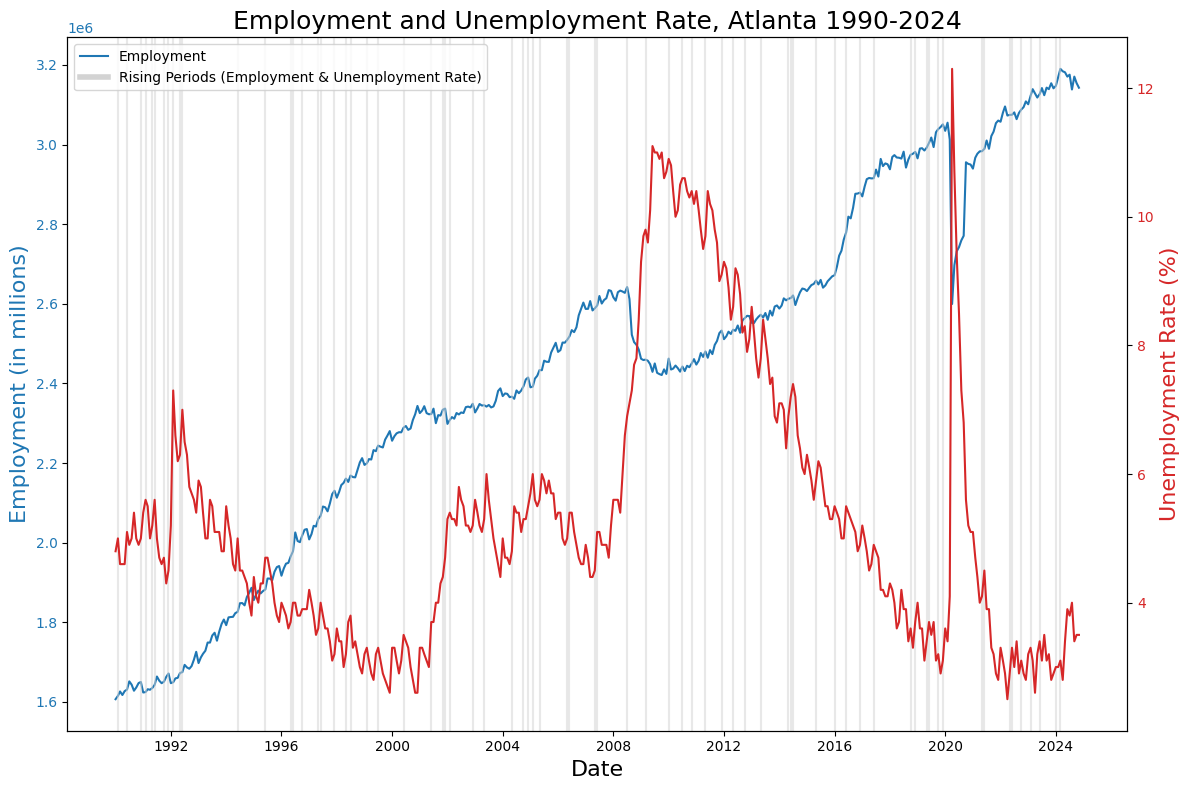

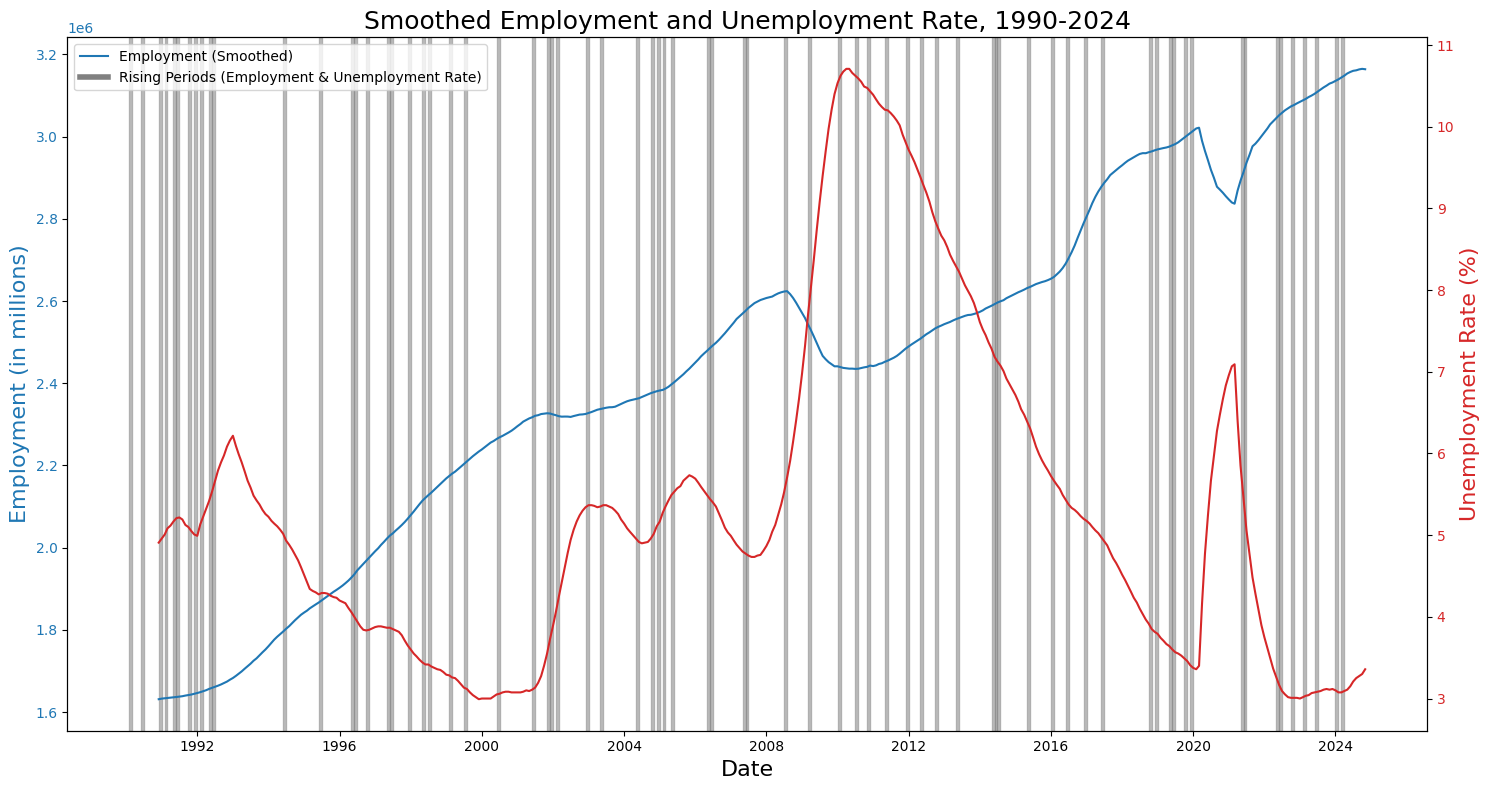

In [70]:
import matplotlib.pyplot as plt

# Create a figure and axis with increased size
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot employed on the primary y-axis
ax1.plot(df_employed.index, df_employed['employed'], color='tab:blue', label='Employment')
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Employment (in millions)', color='tab:blue', fontsize=16)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis to plot unemployment_rate
ax2 = ax1.twinx()
ax2.plot(df_unemployment_rate.index, df_unemployment_rate['unemployment_rate'], color='tab:red', label='Unemployment Rate')
ax2.set_ylabel('Unemployment Rate (%)', color='tab:red', fontsize=16)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add light gray vertical lines to indicate periods where both employment and unemployment rate are rising
for date in df_increasing_periods.index:
    ax1.axvline(x=date, color='lightgray', alpha=0.5)

# Add a title
plt.title('Employment and Unemployment Rate, Atlanta 1990-2024', fontsize=18)

# Add a legend to explain the vertical lines
handles, labels = ax1.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='lightgray', lw=4, label='Rising Periods (Employment & Unemployment Rate)'))
ax1.legend(handles=handles, loc='upper left')

# Show the plot
fig.tight_layout()
plt.show()

# Smooth the lines using rolling mean
df_employed['employed_smooth'] = df_employed['employed'].rolling(window=12).mean()
df_unemployment_rate['unemployment_rate_smooth'] = df_unemployment_rate['unemployment_rate'].rolling(window=12).mean()

# Create a new figure and axis for the smoothed plot with increased size
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot the smoothed employed on the primary y-axis
ax1.plot(df_employed.index, df_employed['employed_smooth'], color='tab:blue', label='Employment (Smoothed)')
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Employment (in millions)', color='tab:blue', fontsize=16)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis to plot the smoothed unemployment_rate
ax2 = ax1.twinx()
ax2.plot(df_unemployment_rate.index, df_unemployment_rate['unemployment_rate_smooth'], color='tab:red', label='Unemployment Rate (Smoothed)')
ax2.set_ylabel('Unemployment Rate (%)', color='tab:red', fontsize=16)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add light gray shading to indicate periods where both employment and unemployment rate are rising
for date in df_increasing_periods.index:
    ax1.axvspan(date, date + pd.DateOffset(months=1), color='gray', alpha=0.5)

# Add a title
plt.title('Smoothed Employment and Unemployment Rate, 1990-2024', fontsize=18)

# Add a legend to explain the shaded areas
handles, labels = ax1.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='gray', lw=4, label='Rising Periods (Employment & Unemployment Rate)'))
ax1.legend(handles=handles, loc='upper left')

# Show the plot
fig.tight_layout()
plt.show()


# Calculcate net change in employment 

In [10]:
#multiple the values in employment_non_farm by 1000
df_employment_non_farm['employment_non_farm'] = df_employment_non_farm['employment_non_farm'] * 1000

In [11]:
# Calculate the difference between consecutive rows
df_employment_non_farm['employed_diff'] = df_employment_non_farm['employment_non_farm'].diff()

In [12]:
df_employment_non_farm.head()

,employment_non_farm,employed_diff
Date,,
1990-01-01,1586400.0,NaN
1990-02-01,1594600.0,8200.0
1990-03-01,1610300.0,15700.0
1990-04-01,1607600.0,-2700.0
1990-05-01,1617300.0,9700.0


In [14]:
## Calculate the annual percent change for employed in both employment_non_farm and employed

# Calculate the annual percent change for employment_non_farm
df_employment_non_farm['annual_percent_change'] = df_employment_non_farm['employment_non_farm'].pct_change(periods=12) * 100

# Calculate the annual percent change for employed
df_employed['annual_percent_change'] = df_employed['employed'].pct_change(periods=12) * 100

# Display the first few rows to verify the calculation
df_employment_non_farm.tail(15)

,employment_non_farm,employed_diff,annual_percent_change
Date,,,
2023-10-01,3073400.0,19600.0,1.141936
2023-11-01,3099200.0,25800.0,1.290976
2023-12-01,3095500.0,-3700.0,1.252780
2024-01-01,3047700.0,-47800.0,0.940615
2024-02-01,3057500.0,9800.0,0.731394
2024-03-01,3068000.0,10500.0,0.967551
2024-04-01,3076300.0,8300.0,1.297376
2024-05-01,3083300.0,7000.0,1.085175
2024-06-01,3098200.0,14900.0,1.231825


In [15]:
#calculcate the net change on a an annual baiss  for both datasets and create a new data frame for each
df_employed_annual = df_employed.resample('A').sum()
df_employment_non_farm_annual = df_employment_non_farm.resample('A').sum()


In [16]:
# Calculate the average annual percent change for each year in df_employed
df_employed_annual['avg_annual_percent_change'] = df_employed['annual_percent_change'].resample('A').mean()

# Calculate the average annual percent change for each year in df_employment_non_farm
df_employment_non_farm_annual['avg_annual_percent_change'] = df_employment_non_farm['annual_percent_change'].resample('A').mean()

# Display the first few rows to verify the calculation
print(df_employed_annual.head())
print(df_employment_non_farm_annual.head())

              employed  employed_diff  employed_smooth  annual_percent_change  \
Date                                                                            
1990-12-31  19577604.0        43301.0     1.631467e+06               0.000000   
1991-12-31  19734920.0        21280.0     1.965450e+07               9.637842   
1992-12-31  20146100.0        54460.0     1.993212e+07              24.960835   
1993-12-31  21028457.0        81133.0     2.059091e+07              52.481445   
1994-12-31  22042160.0        79742.0     2.159349e+07              57.937879   

            avg_annual_percent_change  
Date                                   
1990-12-31                        NaN  
1991-12-31                   0.803154  
1992-12-31                   2.080070  
1993-12-31                   4.373454  
1994-12-31                   4.828157  
            employment_non_farm  employed_diff  annual_percent_change  \
Date                                                                    
1990-1

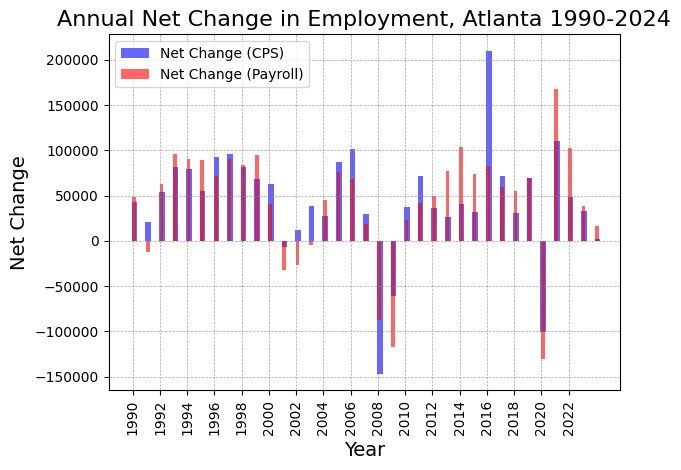

In [17]:
### Plot the net change in employment for both datasets

# Create a figure and axis
fig, ax = plt.subplots()

# Plot net change for df_employed_annual
bar1 = ax.bar(df_employed_annual.index, df_employed_annual['employed_diff'], width=50, color='blue', alpha=0.6, label='Net Change in Employed')

# Plot net change for df_employment_non_farm_annual
bar2 = ax.bar(df_employment_non_farm_annual.index, df_employment_non_farm_annual['employed_diff'], width=25, color='red', alpha=0.6, label='Net Change in Non-Farm Employment')

# Set x-axis ticks and labels for every 2 years
start_year = df_employed_annual.index.year.min()
end_year = df_employed_annual.index.year.max()
# Convert years to datetime for proper tick placement
tick_years = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='2Y')
ax.set_xticks(tick_years)
ax.set_xticklabels([year.year for year in tick_years], rotation=90)  # Added rotation=90 here

# Add labels and title with increased font size
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Net Change', fontsize=14)
ax.set_title('Annual Net Change in Employment, Atlanta 1990-2024', fontsize=16)

# Increase the width of the bars
for bar in bar1:
    bar.set_width(150)
for bar in bar2:
    bar.set_width(100)

# Customize the legend
ax.legend([bar1, bar2], ['Net Change (CPS)', 'Net Change (Payroll)'])

# Add a light grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

plt.tight_layout()  # Added to prevent label cutoff
plt.show()

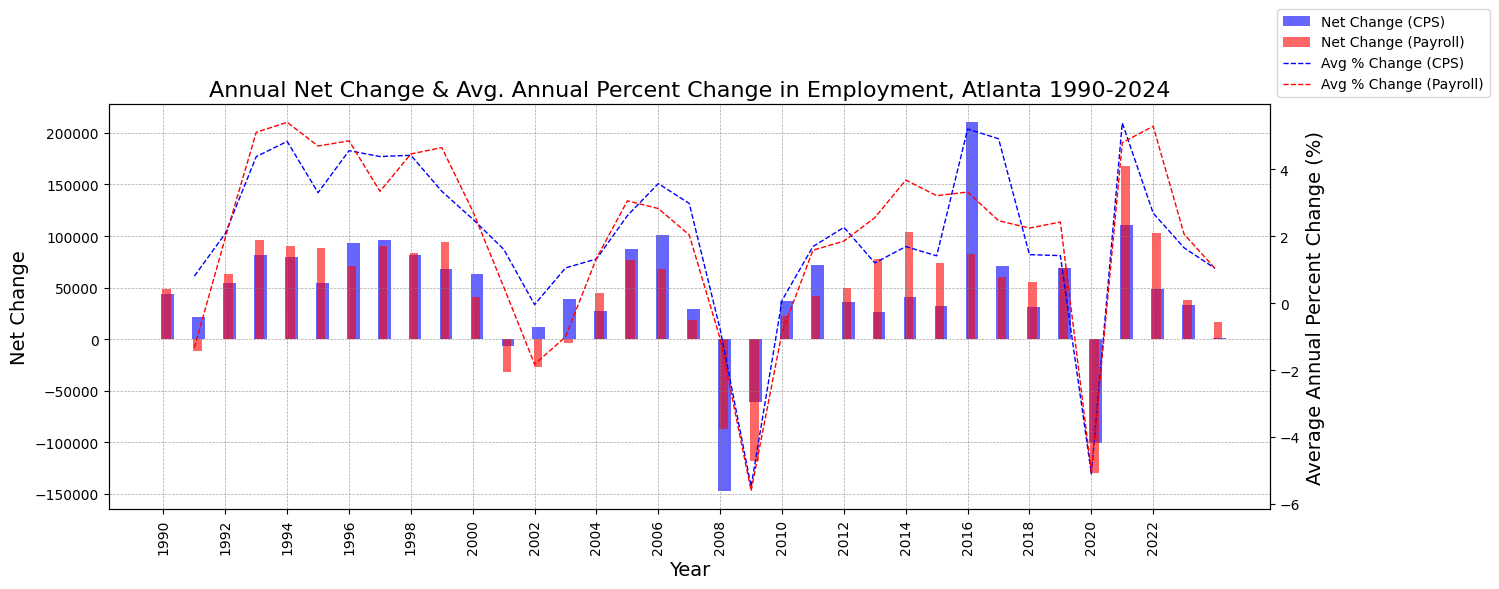

In [18]:
## Chart for both Net Change and Annual Percent Change

# Create figure and primary axis with increased width
fig, ax1 = plt.subplots(figsize=(15, 6))  # Made figure wider

# Plot bars on primary axis (left)
bar1 = ax1.bar(df_employed_annual.index, df_employed_annual['employed_diff'], width=50, color='blue', alpha=0.6, label='Net Change (CPS)')
bar2 = ax1.bar(df_employment_non_farm_annual.index, df_employment_non_farm_annual['employed_diff'], width=25, color='red', alpha=0.6, label='Net Change (Payroll)')

# Create secondary axis (right)
ax2 = ax1.twinx()

# Plot lines on secondary axis with reduced thickness
line1 = ax2.plot(df_employed_annual.index, df_employed_annual['avg_annual_percent_change'], 
                 color='blue', linestyle='--', label='Avg % Change (CPS)', linewidth=1)  # Reduced line thickness
line2 = ax2.plot(df_employment_non_farm_annual.index, df_employment_non_farm_annual['avg_annual_percent_change'], 
                 color='red', linestyle='--', label='Avg % Change (Payroll)', linewidth=1)  # Reduced line thickness

# Set x-axis ticks and labels
start_year = df_employed_annual.index.year.min()
end_year = df_employed_annual.index.year.max()
tick_years = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='2Y')
ax1.set_xticks(tick_years)
ax1.set_xticklabels([year.year for year in tick_years], rotation=90)

# Labels and title
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Net Change', fontsize=14)
ax2.set_ylabel('Average Annual Percent Change (%)', fontsize=14)
ax1.set_title('Annual Net Change & Avg. Annual Percent Change in Employment, Atlanta 1990-2024', fontsize=16)

# Adjust bar widths
for bar in bar1:
    bar.set_width(150)
for bar in bar2:
    bar.set_width(100)

# Combine legends from both axes and place outside
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, bbox_to_anchor=(1, 1), loc='lower left')  # Moved legend outside

# Add grid
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# Adjust layout to accommodate the legend
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Make room for legend
plt.show()

In [19]:
df_employed_annual.tail()

,employed,employed_diff,employed_smooth,annual_percent_change,avg_annual_percent_change
Date,,,,,
2020-12-31,34259910.0,-100925.0,3.523938e+07,-61.260026,-5.105002
2021-12-31,36007280.0,110473.0,3.504230e+07,64.580435,5.381703
2022-12-31,36970653.0,48157.0,3.661621e+07,32.221687,2.685141
2023-12-31,37580321.0,32900.0,3.729279e+07,19.794150,1.649513
2024-12-31,34825682.0,1476.0,3.469163e+07,12.420970,1.035081


In [20]:
df_employment_non_farm_annual.tail()

,employment_non_farm,employed_diff,annual_percent_change,avg_annual_percent_change
Date,,,,
2020-12-31,32631700.0,-130100.0,-60.522775,-5.043565
2021-12-31,34128400.0,167900.0,57.491970,4.790997
2022-12-31,35923600.0,103100.0,63.374674,5.281223
2023-12-31,36658400.0,38300.0,24.689239,2.057437
2024-12-31,33923600.0,16600.0,12.367171,1.030598


## Forecasting Employment in Professional and Business Service Jobs

In [6]:
df_employment_professional_business_services.tail()

,employment_professional_business_services
Date,
2024-08-01,583.3
2024-09-01,580.1
2024-10-01,580.8
2024-11-01,579.7
2024-12-01,NaN


In [7]:
# Calculate the difference between consecutive rows
df_employment_professional_business_services['employed_diff'] = df_employment_professional_business_services['employment_professional_business_services'].diff()

# Calculate the annual percent change for employment_non_farm
df_employment_professional_business_services['annual_percent_change'] = df_employment_professional_business_services['employment_professional_business_services'].pct_change(periods=12) * 100

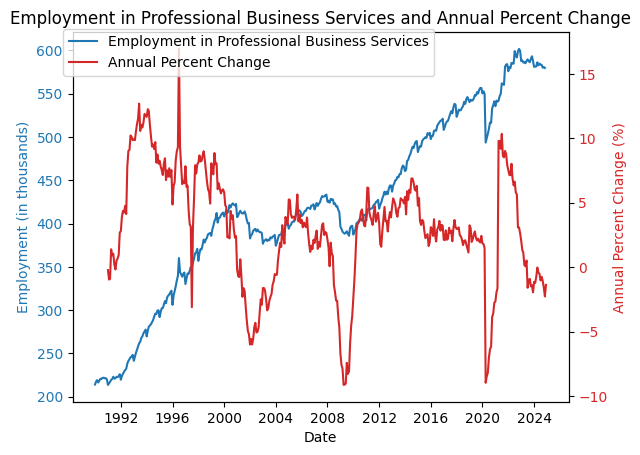

In [8]:
fig, ax1 = plt.subplots()

# Plot employment_professional_business_services on the primary y-axis
ax1.plot(df_employment_professional_business_services.index, df_employment_professional_business_services['employment_professional_business_services'], color='tab:blue', label='Employment in Professional Business Services')
ax1.set_xlabel('Date')
ax1.set_ylabel('Employment (in thousands)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis to plot annual_percent_change
ax2 = ax1.twinx()
ax2.plot(df_employment_professional_business_services.index, df_employment_professional_business_services['annual_percent_change'], color='tab:red', label='Annual Percent Change')
ax2.set_ylabel('Annual Percent Change (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a title
plt.title('Employment in Professional Business Services and Annual Percent Change')

# Add a legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()

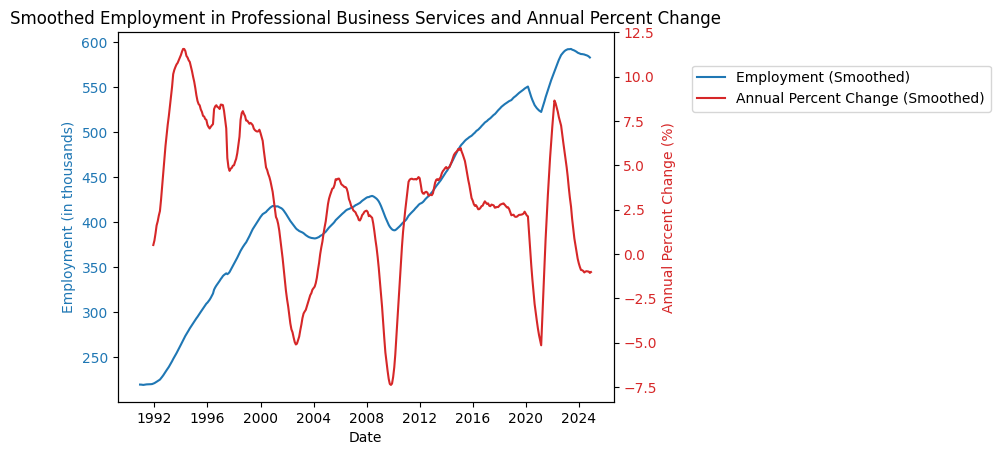

In [9]:
# Smooth the lines using rolling mean
df_employment_professional_business_services['employment_smooth'] = df_employment_professional_business_services['employment_professional_business_services'].rolling(window=12).mean()
df_employment_professional_business_services['annual_percent_change_smooth'] = df_employment_professional_business_services['annual_percent_change'].rolling(window=12).mean()

# Create a new figure and axis for the smoothed plot
fig, ax1 = plt.subplots()

# Plot the smoothed employment on the primary y-axis
ax1.plot(df_employment_professional_business_services.index, df_employment_professional_business_services['employment_smooth'], color='tab:blue', label='Employment (Smoothed)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Employment (in thousands)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis to plot the smoothed annual percent change
ax2 = ax1.twinx()
ax2.plot(df_employment_professional_business_services.index, df_employment_professional_business_services['annual_percent_change_smooth'], color='tab:red', label='Annual Percent Change (Smoothed)')
ax2.set_ylabel('Annual Percent Change (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a title
plt.title('Smoothed Employment in Professional Business Services and Annual Percent Change')

# Add a legend
fig.legend(loc='lower right', bbox_to_anchor=(1.5, .7))

# Show the plot
plt.show()

In [10]:
# Create a new dataframe with only the employment_professional_business_services column
df_employment_professional_business_services_clean = df_employment_professional_business_services[['employment_professional_business_services']].copy()

# Display the first few rows of the new dataframe to verify
df_employment_professional_business_services_clean.head()

,employment_professional_business_services
Date,
1990-01-01,214.2
1990-02-01,217.7
1990-03-01,219.2
1990-04-01,216.5
1990-05-01,218.5


In [11]:
df_employment_professional_business_services_clean.dropna(inplace=True)

In [12]:
from pycaret.time_series import *
s = setup(df_employment_professional_business_services_clean, fh = 12, session_id = 123)

,Description,Value
0,session_id,123
1,Target,employment_professional_business_services
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(419, 1)"
5,Transformed data shape,"(419, 1)"
6,Transformed train set shape,"(407, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [13]:
# import TSForecastingExperiment and init the class
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()

In [14]:
# check the type of exp
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [15]:
# init setup on exp
exp.setup(df_employment_professional_business_services_clean, fh = 12, session_id = 123)

,Description,Value
0,session_id,123
1,Target,employment_professional_business_services
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(419, 1)"
5,Transformed data shape,"(419, 1)"
6,Transformed train set shape,"(407, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [16]:
# check statistical tests on original data
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,419.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,419.535084
3,Summary,Statistics,Transformed,Median,,414.0
4,Summary,Statistics,Transformed,Standard Deviation,,101.787429
5,Summary,Statistics,Transformed,Variance,,10360.680704
6,Summary,Statistics,Transformed,Kurtosis,,-0.553452
7,Summary,Statistics,Transformed,Skewness,,-0.18987
8,Summary,Statistics,Transformed,# Distinct Values,,378.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",8070.772431


In [17]:
# compare baseline models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.5983,0.6223,10.4533,12.3559,0.0181,0.0182,-3.9394,0.3300
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.6581,0.6467,11.4413,12.7769,0.0200,0.0201,-3.9176,0.2467
exp_smooth,Exponential Smoothing,0.6591,0.6699,11.4877,13.2812,0.0200,0.0201,-4.6127,0.1167
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.6628,0.6505,11.5198,12.8497,0.0201,0.0203,-3.9277,0.2433
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.6823,0.6886,11.9533,13.7096,0.0207,0.0207,-6.2884,0.3567
theta,Theta Forecaster,0.6939,0.7049,12.0507,13.9139,0.0210,0.0212,-3.1228,0.0400
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.7086,0.7181,12.3669,14.2411,0.0214,0.0215,-4.6041,0.3600
naive,Naive Forecaster,0.7144,0.7709,12.4500,15.2405,0.0215,0.0217,-4.2854,3.8800
ets,ETS,0.7275,0.7374,12.6548,14.5863,0.0220,0.0222,-5.1444,0.1933
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.7405,0.7144,12.8345,14.0679,0.0225,0.0228,-4.1568,0.3500


In [18]:
# Evaluate the best model
predictions = predict_model(best)

# Display the predictions
print(predictions)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,OrthogonalMatchingPursuit,0.6535,0.6416,11.5946,13.1464,0.0199,0.0197,-28.9173


           y_pred
2023-12  593.6858
2024-01  584.2352
2024-02  588.3316
2024-03  590.4824
2024-04  590.6508
2024-05  592.2282
2024-06  594.7860
2024-07  596.5784
2024-08  598.4178
2024-09  597.9173
2024-10  601.7180
2024-11  602.8036


In [19]:
final_best = finalize_model(best)


In [28]:
df_employment_professional_business_services.tail(15)

,employment_professional_business_services,employed_diff,annual_percent_change,employment_smooth,annual_percent_change_smooth,y_pred
2024-10-01 00:00:00,580.8,0.7,-1.592680,583.850,-0.993141,NaN
2024-11-01 00:00:00,579.7,-1.1,-2.275792,582.725,-1.065069,NaN
2024-12,NaN,NaN,NaN,NaN,NaN,580.3074
2025-01,NaN,NaN,NaN,NaN,NaN,571.2303
2025-02,NaN,NaN,NaN,NaN,NaN,575.5084
2025-03,NaN,NaN,NaN,NaN,NaN,577.8920
2025-04,NaN,NaN,NaN,NaN,NaN,578.4863
2025-05,NaN,NaN,NaN,NaN,NaN,580.2124
2025-06,NaN,NaN,NaN,NaN,NaN,582.9565
2025-07,NaN,NaN,NaN,NaN,NaN,585.0354


In [22]:
# Ensure the dataset is preprocessed correctly
df_employment_professional_business_services.dropna(inplace=True)

In [24]:
# Extend the index to include dates up to 2025-12-01
extended_index = pd.date_range(start=df_employment_professional_business_services.index[0], end='2025-12-01', freq='MS')

# Reindex the dataframe to include the new dates
df_employment_professional_business_services = df_employment_professional_business_services.reindex(extended_index)

# Display the updated dataframe
df_employment_professional_business_services.tail(15)

,employment_professional_business_services,employed_diff,annual_percent_change,employment_smooth,annual_percent_change_smooth
2024-10-01,580.8,0.7,-1.592680,583.850,-0.993141
2024-11-01,579.7,-1.1,-2.275792,582.725,-1.065069
2024-12-01,NaN,NaN,NaN,NaN,NaN
2025-01-01,NaN,NaN,NaN,NaN,NaN
2025-02-01,NaN,NaN,NaN,NaN,NaN
2025-03-01,NaN,NaN,NaN,NaN,NaN
2025-04-01,NaN,NaN,NaN,NaN,NaN
2025-05-01,NaN,NaN,NaN,NaN,NaN
2025-06-01,NaN,NaN,NaN,NaN,NaN
2025-07-01,NaN,NaN,NaN,NaN,NaN


In [25]:
# Forecast values 13 months out using the final_best model
future_predictions_final = predict_model(final_best, fh=13)

In [26]:
## Merge the actual dataset and the predicted values

# Append the predictions to the original dataset
df_employment_professional_business_services = pd.concat([df_employment_professional_business_services, future_predictions_final])


,employment_professional_business_services,employed_diff,annual_percent_change,employment_smooth,annual_percent_change_smooth,y_pred
2024-10-01 00:00:00,580.8,0.7,-1.592680,583.850,-0.993141,NaN
2024-11-01 00:00:00,579.7,-1.1,-2.275792,582.725,-1.065069,NaN
2024-12,NaN,NaN,NaN,NaN,NaN,580.3074
2025-01,NaN,NaN,NaN,NaN,NaN,571.2303
2025-02,NaN,NaN,NaN,NaN,NaN,575.5084
2025-03,NaN,NaN,NaN,NaN,NaN,577.8920
2025-04,NaN,NaN,NaN,NaN,NaN,578.4863
2025-05,NaN,NaN,NaN,NaN,NaN,580.2124
2025-06,NaN,NaN,NaN,NaN,NaN,582.9565
2025-07,NaN,NaN,NaN,NaN,NaN,585.0354


In [31]:
## Fix the date format after concatenating the actual with predictoins

# Step 1: Convert the index to a string format
df_employment_professional_business_services.index = df_employment_professional_business_services.index.astype(str)

# Step 2: Extract the year and month from the string
df_employment_professional_business_services.index = df_employment_professional_business_services.index.str[:7]

# Step 3: Recreate the index using the extracted year and month
df_employment_professional_business_services.index = pd.to_datetime(df_employment_professional_business_services.index, format='%Y-%m')

# Step 4: Convert the index back to the desired year-month format
df_employment_professional_business_services.index = df_employment_professional_business_services.index.strftime('%Y-%m')

# Display the first few rows to verify the change
df_employment_professional_business_services.tail()

,employment_professional_business_services,employed_diff,annual_percent_change,employment_smooth,annual_percent_change_smooth,y_pred
2025-08,NaN,NaN,NaN,NaN,NaN,587.0415
2025-09,NaN,NaN,NaN,NaN,NaN,586.7881
2025-10,NaN,NaN,NaN,NaN,NaN,590.8475
2025-11,NaN,NaN,NaN,NaN,NaN,592.2426
2025-12,NaN,NaN,NaN,NaN,NaN,592.8092


In [33]:
# Move the values in y_pred to employment_professional_business_services from 2024-12 to 2025-12
df_employment_professional_business_services.loc['2024-12':'2025-12', 'employment_professional_business_services'] = df_employment_professional_business_services.loc['2024-12':'2025-12', 'y_pred']

#Drop the column y_pred
df_employment_professional_business_services.drop(columns=['y_pred'], inplace=True)

# Display the updated dataframe
df_employment_professional_business_services.tail(15)

,employment_professional_business_services,employed_diff,annual_percent_change,employment_smooth,annual_percent_change_smooth,y_pred
2024-10,580.8000,0.7,-1.592680,583.850,-0.993141,NaN
2024-11,579.7000,-1.1,-2.275792,582.725,-1.065069,NaN
2024-12,580.3074,NaN,NaN,NaN,NaN,580.3074
2025-01,571.2303,NaN,NaN,NaN,NaN,571.2303
2025-02,575.5084,NaN,NaN,NaN,NaN,575.5084
2025-03,577.8920,NaN,NaN,NaN,NaN,577.8920
2025-04,578.4863,NaN,NaN,NaN,NaN,578.4863
2025-05,580.2124,NaN,NaN,NaN,NaN,580.2124
2025-06,582.9565,NaN,NaN,NaN,NaN,582.9565
2025-07,585.0354,NaN,NaN,NaN,NaN,585.0354


In [37]:
# Display the updated dataframe
df_employment_professional_business_services.tail(15)

,employment_professional_business_services,employed_diff,annual_percent_change,employment_smooth,annual_percent_change_smooth
2024-10,580.8000,0.7000,-1.592680,583.850,-0.993141
2024-11,579.7000,-1.1000,-2.275792,582.725,-1.065069
2024-12,580.3074,0.6074,-1.274685,NaN,NaN
2025-01,571.2303,-9.0771,-1.681532,NaN,NaN
2025-02,575.5084,4.2781,-0.996319,NaN,NaN
2025-03,577.8920,2.3836,-0.620464,NaN,NaN
2025-04,578.4863,0.5943,-1.315882,NaN,NaN
2025-05,580.2124,1.7261,-0.426909,NaN,NaN
2025-06,582.9565,2.7441,-0.315236,NaN,NaN
2025-07,585.0354,2.0789,0.263136,NaN,NaN


In [36]:
# Calculate the month-to-month difference for entries from 2024-12 onwards
df_employment_professional_business_services.loc['2024-12':, 'employed_diff'] = df_employment_professional_business_services['employment_professional_business_services'].diff()

# Calculate the annual percent change for employed_diff from 2024-12 onwards
df_employment_professional_business_services.loc['2024-12':, 'annual_percent_change'] = df_employment_professional_business_services['employment_professional_business_services'].pct_change(periods=12) * 100


In [42]:
# Sum the employed_diff from 2019-01 to 2019-11
sum_2019 = df_employment_professional_business_services.loc['2019-01':'2019-11', 'employed_diff'].sum()

# Sum the employed_diff from 2020-01 to 2020-11
sum_2020 = df_employment_professional_business_services.loc['2020-01':'2020-11', 'employed_diff'].sum()

# Sum the employed_diff from 2021-01 to 2021-11
sum_2021 = df_employment_professional_business_services.loc['2021-01':'2021-11', 'employed_diff'].sum()

# Sum the employed_diff from 2022-01 to 2022-11
sum_2022 = df_employment_professional_business_services.loc['2022-01':'2022-11', 'employed_diff'].sum()

# Sum the employed_diff from 2023-01 to 2023-11
sum_2023 = df_employment_professional_business_services.loc['2023-01':'2023-11', 'employed_diff'].sum()

# Sum the employed_diff from 2024-01 to 2024-11
sum_2024 = df_employment_professional_business_services.loc['2024-01':'2024-11', 'employed_diff'].sum()

# Sum the employed_diff from 2025-01 to 2025-11
sum_2025 = df_employment_professional_business_services.loc['2025-01':'2025-11', 'employed_diff'].sum()

# Print the results
print(f"Sum of employed_diff from 2019-01 to 2019-11: {sum_2019}")
print(f"Sum of employed_diff from 2020-01 to 2020-11: {sum_2020}")
print(f"Sum of employed_diff from 2021-01 to 2021-11: {sum_2021}")
print(f"Sum of employed_diff from 2022-01 to 2022-11: {sum_2022}")
print(f"Sum of employed_diff from 2023-01 to 2023-11: {sum_2023}")
print(f"Sum of employed_diff from 2024-01 to 2024-11: {sum_2024}")
print(f"Sum of employed_diff from 2025-01 to 2025-11: {sum_2025}")

Sum of employed_diff from 2019-01 to 2019-11: 13.200000000000045
Sum of employed_diff from 2020-01 to 2020-11: -20.0
Sum of employed_diff from 2021-01 to 2021-11: 42.5
Sum of employed_diff from 2022-01 to 2022-11: 17.600000000000023
Sum of employed_diff from 2023-01 to 2023-11: -6.2999999999999545
Sum of employed_diff from 2024-01 to 2024-11: -8.099999999999909
Sum of employed_diff from 2025-01 to 2025-11: 11.935200000000009


In [41]:

# Mean the annual_percent_change from 2019-01 to 2019-11
mean_2019 = df_employment_professional_business_services.loc['2019-01':'2019-11', 'annual_percent_change'].mean()

# Print the result
print(f"Mean of annual_percent_change from 2019-01 to 2019-11: {mean_2019}")
# Mean the annual_percent_change from 2020-01 to 2020-11
mean_2020 = df_employment_professional_business_services.loc['2020-01':'2020-11', 'annual_percent_change'].mean()

# Mean the annual_percent_change from 2021-01 to 2021-11
mean_2021 = df_employment_professional_business_services.loc['2021-01':'2021-11', 'annual_percent_change'].mean()

# Mean the annual_percent_change from 2022-01 to 2022-11
mean_2022 = df_employment_professional_business_services.loc['2022-01':'2022-11', 'annual_percent_change'].mean()

# Mean the annual_percent_change from 2023-01 to 2023-11
mean_2023 = df_employment_professional_business_services.loc['2023-01':'2023-11', 'annual_percent_change'].mean()

# Mean the annual_percent_change from 2024-01 to 2024-11
mean_2024 = df_employment_professional_business_services.loc['2024-01':'2024-11', 'annual_percent_change'].mean()

# Mean the annual_percent_change from 2025-01 to 2025-11
mean_2025 = df_employment_professional_business_services.loc['2025-01':'2025-11', 'annual_percent_change'].mean()

# Print the results
print(f"Mean of annual_percent_change from 2020-01 to 2020-11: {mean_2020}")
print(f"Mean of annual_percent_change from 2021-01 to 2021-11: {mean_2021}")
print(f"Mean of annual_percent_change from 2022-01 to 2022-11: {mean_2022}")
print(f"Mean of annual_percent_change from 2023-01 to 2023-11: {mean_2023}")
print(f"Mean of annual_percent_change from 2024-01 to 2024-11: {mean_2024}")
print(f"Mean of annual_percent_change from 2025-01 to 2025-11: {mean_2025}")

Mean of annual_percent_change from 2019-01 to 2019-11: 2.3827857531613335
Mean of annual_percent_change from 2020-01 to 2020-11: -4.329936955878245
Mean of annual_percent_change from 2021-01 to 2021-11: 6.167045300128064
Mean of annual_percent_change from 2022-01 to 2022-11: 6.11978565889362
Mean of annual_percent_change from 2023-01 to 2023-11: -0.1067727153189106
Mean of annual_percent_change from 2024-01 to 2024-11: -0.9844726548710522
Mean of annual_percent_change from 2025-01 to 2025-11: 0.05406643039155186


## Using the Prophet Model

#SMU13120606000000001 

In [2]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [5]:
from prophet import Prophet


In [8]:
df = process_file('../data/SMU13120606000000001.xlsx')

DataFrame for employment_professional_business_services:
            employment_professional_business_services
Date                                                 
1990-01-01                                      214.2
1990-02-01                                      217.7
1990-03-01                                      219.2
1990-04-01                                      216.5
1990-05-01                                      218.5




In [9]:
df = df_employment_professional_business_services

In [10]:
df.drop(pd.to_datetime('2024-12-01'), inplace=True)

In [11]:
df.tail()

,employment_professional_business_services
Date,
2024-07-01,583.5
2024-08-01,583.3
2024-09-01,580.1
2024-10-01,580.8
2024-11-01,579.7


In [12]:
# Convert the Date column to string format
df.index = df.index.strftime('%Y-%m')

# Display the updated dataframe
df.head()

,employment_professional_business_services
Date,
1990-01,214.2
1990-02,217.7
1990-03,219.2
1990-04,216.5
1990-05,218.5


In [13]:
df.dtypes

employment_professional_business_services    float64
dtype: object

In [14]:
# Rename the columns to match Prophet's expected format
df_prophet = df.reset_index().rename(columns={'Date': 'ds', 'employment_professional_business_services': 'y'})

# Initialize and fit the Prophet model
m = Prophet()
m.fit(df_prophet)

11:15:49 - cmdstanpy - INFO - Chain [1] start processing
11:15:50 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future = m.make_future_dataframe(periods=13, freq='M')
future.tail()

,ds
427,2025-07-31
428,2025-08-31
429,2025-09-30
430,2025-10-31
431,2025-11-30


In [17]:
future.tail(15)

,ds
417,2024-10-01
418,2024-11-01
419,2024-11-30
420,2024-12-31
421,2025-01-31
422,2025-02-28
423,2025-03-31
424,2025-04-30
425,2025-05-31
426,2025-06-30


In [19]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
417,2024-10-01,598.144205,586.092448,609.244744
418,2024-11-01,598.580515,586.573455,609.781018
419,2024-11-30,599.489398,588.211989,611.224404
420,2024-12-31,591.504575,579.845682,602.474468
421,2025-01-31,594.073982,581.971429,604.943469
422,2025-02-28,597.250113,585.541435,607.957944
423,2025-03-31,600.258434,588.401130,611.780123
424,2025-04-30,600.498617,589.094179,612.949538
425,2025-05-31,602.384009,590.632925,614.026327
426,2025-06-30,599.609105,588.375280,611.129094


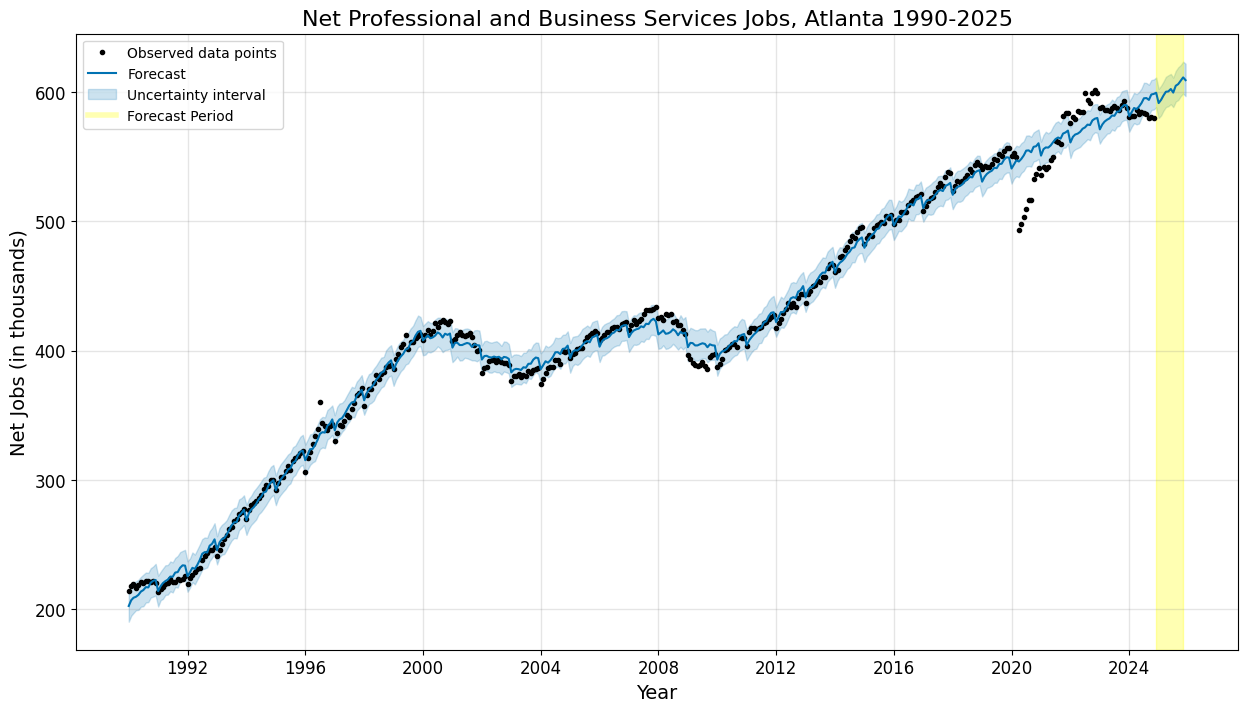

In [35]:
fig1 = plt.figure(figsize=(15, 8))  # Adjusted the figure size to make it wider
ax = fig1.gca()
m.plot(forecast, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Net Jobs (in thousands)')
ax.set_title('Net Professional and Business Services Jobs, Atlanta 1990-2025')

# Highlight the forecast part from 2024-12 to 2025-11
forecast_start = pd.to_datetime('2024-12-01')
forecast_end = pd.to_datetime('2025-11-01')
ax.axvspan(forecast_start, forecast_end, color='yellow', alpha=0.3)

# Add a legend to explain the elements in the chart
handles, labels = ax.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='yellow', lw=4, alpha=0.3, label='Forecast Period'))
ax.legend(handles=handles, loc='upper left')
# Increase the size of the fonts of labels and titles
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
ax.title.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()


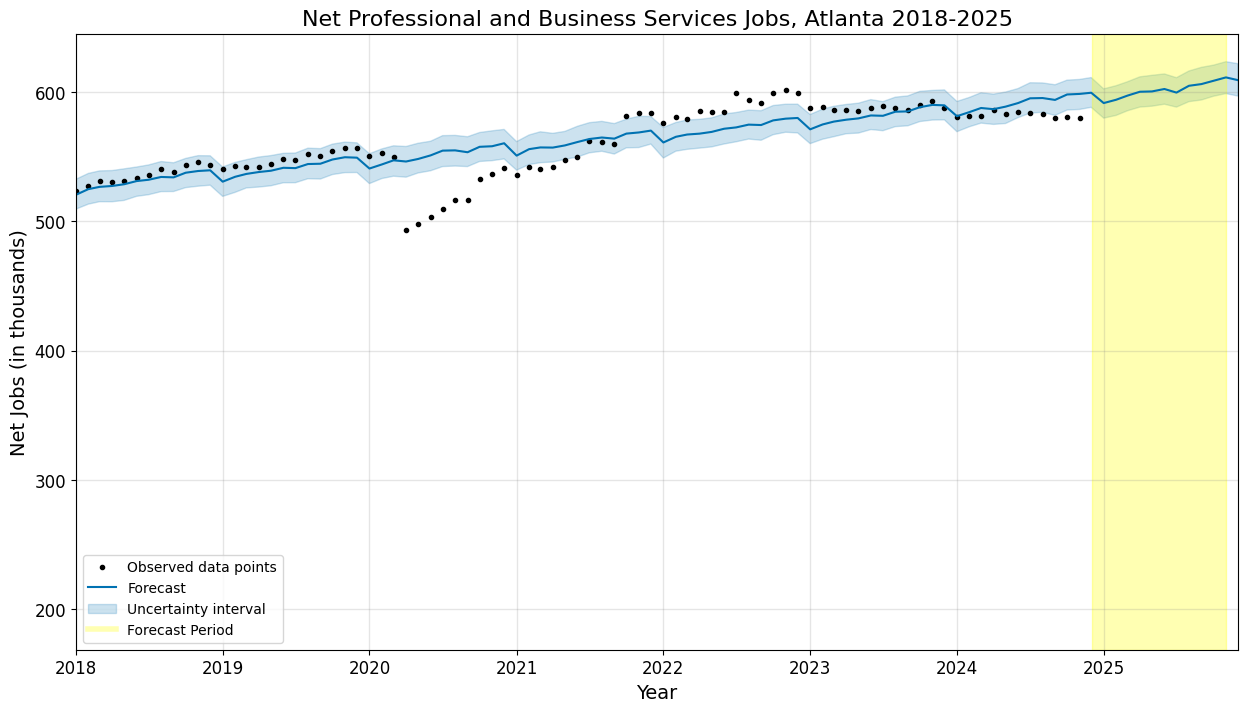

In [39]:
fig1 = plt.figure(figsize=(15, 8))  # Adjusted the figure size to make it wider
ax = fig1.gca()
m.plot(forecast, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Net Jobs (in thousands)')
ax.set_title('Net Professional and Business Services Jobs, Atlanta 2018-2025')

# Set the x-axis limits to zoom in on the part from 2019 to 2025
ax.set_xlim(pd.to_datetime('2018-01-01'), pd.to_datetime('2025-12-01'))

# Highlight the forecast part from 2024-12 to 2025-11
forecast_start = pd.to_datetime('2024-12-01')
forecast_end = pd.to_datetime('2025-11-01')
ax.axvspan(forecast_start, forecast_end, color='yellow', alpha=0.3)

# Add a legend to explain the elements in the chart
handles, labels = ax.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='yellow', lw=4, alpha=0.3, label='Forecast Period'))
ax.legend(handles=handles, loc='lower left')

# Increase the size of the fonts of labels and titles
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
ax.title.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

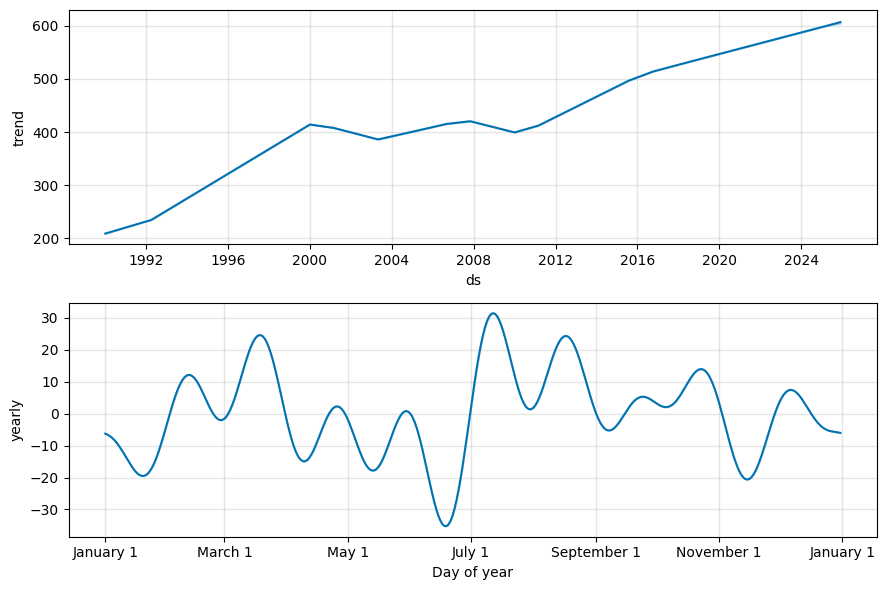

In [21]:
fig2 = m.plot_components(forecast)


In [22]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [43]:
forecast.tail(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
417,2024-10-01,595.023141,586.092448,609.244744,595.023141,595.023141,3.121064,3.121064,3.121064,3.121064,3.121064,3.121064,0.0,0.0,0.0,598.144205
418,2024-11-01,595.881921,586.573455,609.781018,595.881921,595.881921,2.698593,2.698593,2.698593,2.698593,2.698593,2.698593,0.0,0.0,0.0,598.580515
419,2024-11-30,596.685297,588.211989,611.224404,596.685297,596.685297,2.804101,2.804101,2.804101,2.804101,2.804101,2.804101,0.0,0.0,0.0,599.489398
420,2024-12-31,597.544078,579.845682,602.474468,597.544078,597.544078,-6.039503,-6.039503,-6.039503,-6.039503,-6.039503,-6.039503,0.0,0.0,0.0,591.504575
421,2025-01-31,598.402859,581.971429,604.943469,598.402859,598.402859,-4.328876,-4.328876,-4.328876,-4.328876,-4.328876,-4.328876,0.0,0.0,0.0,594.073982
422,2025-02-28,599.178531,585.541435,607.957944,599.178531,599.259816,-1.928419,-1.928419,-1.928419,-1.928419,-1.928419,-1.928419,0.0,0.0,0.0,597.250113
423,2025-03-31,600.037312,588.401130,611.780123,599.917365,600.294463,0.221122,0.221122,0.221122,0.221122,0.221122,0.221122,0.0,0.0,0.0,600.258434
424,2025-04-30,600.868390,589.094179,612.949538,600.513950,601.362583,-0.369774,-0.369774,-0.369774,-0.369774,-0.369774,-0.369774,0.0,0.0,0.0,600.498617
425,2025-05-31,601.727171,590.632925,614.026327,601.133838,602.490417,0.656838,0.656838,0.656838,0.656838,0.656838,0.656838,0.0,0.0,0.0,602.384009
426,2025-06-30,602.558249,588.375280,611.129094,601.603465,603.629968,-2.949145,-2.949145,-2.949145,-2.949145,-2.949145,-2.949145,0.0,0.0,0.0,599.609105


In [42]:
df_employment_professional_business_services.tail(15)

,employment_professional_business_services
Date,
2023-09,586.4
2023-10,590.2
2023-11,593.2
2023-12,587.8
2024-01,581.0
2024-02,581.3
2024-03,581.5
2024-04,586.2
2024-05,582.7


In [49]:
# Calculate the month-on-month net change
df['employment_professional_business_services_diff'] = df['employment_professional_business_services'].diff()

# Display the first few rows to verify the calculation
df.head()

,employment_professional_business_services,employment_professional_business_services_diff
Date,,
1990-01,214.2,NaN
1990-02,217.7,3.5
1990-03,219.2,1.5
1990-04,216.5,-2.7
1990-05,218.5,2.0


In [50]:
# Calculate the month-on-month change in yhat
forecast['yhat_diff'] = forecast['yhat'].diff()

# Display the first few rows to verify the calculation
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,yhat_diff
0,1990-01-01,208.723713,190.370925,214.429981,208.723713,208.723713,-6.184786,-6.184786,-6.184786,-6.184786,-6.184786,-6.184786,0.0,0.0,0.0,202.538927,NaN
1,1990-02-01,209.693818,195.029953,218.252314,209.693818,209.693818,-2.655572,-2.655572,-2.655572,-2.655572,-2.655572,-2.655572,0.0,0.0,0.0,207.038246,4.499319
2,1990-03-01,210.570041,197.138405,220.921835,210.570041,210.570041,-1.669058,-1.669058,-1.669058,-1.669058,-1.669058,-1.669058,0.0,0.0,0.0,208.900983,1.862738
3,1990-04-01,211.540146,199.299962,221.594641,211.540146,211.540146,-1.846304,-1.846304,-1.846304,-1.846304,-1.846304,-1.846304,0.0,0.0,0.0,209.693841,0.792858
4,1990-05-01,212.478957,199.507456,222.717277,212.478957,212.478957,-1.334564,-1.334564,-1.334564,-1.334564,-1.334564,-1.334564,0.0,0.0,0.0,211.144392,1.450551


In [51]:
# Filter the forecast dataset for the desired date range
forecast_2025 = forecast[(forecast['ds'] >= '2025-01-01') & (forecast['ds'] <= '2025-11-30')]

# Sum the yhat values in the filtered dataset
sum_yhat_2025 = forecast_2025['yhat_diff'].sum()

# Print the result
print(f"Sum of yhat_diff from 2025-01 to 2025-11: {sum_yhat_2025}")

Sum of yhat_diff from 2025-01 to 2025-11: 17.71960014013439


In [53]:
# Filter the forecast dataset for the desired date range
jobs_2024 = df_employment_professional_business_services[(df_employment_professional_business_services.index >= '2024-01') & (df_employment_professional_business_services.index <= '2024-11')]

# Sum the employment values in the filtered dataset
net_jobs_2024 = jobs_2024['employment_professional_business_services_diff'].sum()

# Print the result
print(net_jobs_2024)

-8.099999999999909


In [56]:
(sum_yhat_2025 - net_jobs_2024) / (net_jobs_2024 * 100)

-0.031876049555721715

In [57]:
(sum_yhat_2025 - net_jobs_2024)

25.8196001401343